# Model Evaluation and Hyperparameter Tuning

CSI 4106 - Fall 2025

Marcel Turcotte  
Version: Sep 21, 2025 15:55

# Preamble

## Message of the Day

![](https://static.wixstatic.com/media/a4c5cd_17f35b4279124d5a813dd3e3f61b4d5f~mv2.png/v1/fill/w_1960,h_1102,al_c,q_95,usm_0.66_1.00_0.01,enc_avif,quality_auto/ETH_Apertus_Keyvisual_Final-LY2-3.png)

[Apertus: a fully open, transparent, multilingual language
model](https://ethz.ch/en/news-and-events/eth-news/news/2025/09/press-release-apertus-a-fully-open-transparent-multilingual-language-model.html),
ETH Zürich, Press Release, 2025-09-02.

> EPFL, ETH Zurich and the Swiss National Supercomputing Centre (CSCS)
> released Apertus 2 September, Switzerland’s first large-scale, open,
> multilingual language model — a milestone in generative AI for
> transparency and diversity.

-   [www.swiss-ai.org/apertus](https://www.swiss-ai.org/apertus)
-   Downloads available at [Hugging
    Face](https://huggingface.co/collections/swiss-ai/apertus-llm-68b699e65415c231ace3b059)
-   [Public access](https://publicai.co)

Should Canada undertake such an extensive project?

Canada is recognized for its exceptional AI research, supported by
several renowned research institutions and scholars. Notable examples
include:

-   The [Vector Institute](https://vectorinstitute.ai/) in Toronto,
    which is home to distinguished researchers like [Geoffrey
    Hinton](https://vectorinstitute.ai/team/geoffrey-hinton/), a
    recipient of the 2018 Turing Award for his pioneering work in deep
    learning and the 2024 Nobel Prize in Physics.

-   [Mila](https://mila.quebec/en) in Montréal, led by [Yoshua
    Bengio](https://mila.quebec/en/directory/yoshua-bengio), another
    2018 Turing Award laureate recognized for his contributions to deep
    learning.

-   The [Alberta Machine Intelligence Institute
    (Amii)](https://www.amii.ca), where [Richard S.
    Sutton](https://www.amii.ca/people/richard-s-sutton) is a key figure
    and was awarded the 2024 Turing Award for his influential work in
    reinforcement learning.

These institutions and individuals underscore Canada’s leadership and
ongoing commitment to advancing artificial intelligence research.

The [Digital Research Alliance of
Canada](https://www.alliancecan.ca/en), supported by a [\$2 billion
commitment from the Government of Canada in
2024](https://ised-isde.canada.ca/site/ised/en/public-consultations/securing-canadas-ai-advantage-foundational-blueprint),
provides cutting-edge infrastructure for advanced research. Notably, the
high-performance computing resource,
[Nibi](https://docs.alliancecan.ca/wiki/Nibi), was launched on July 31,
2025. It features 134,400 CPU cores and 288 NVIDIA H100 GPUs,
significantly enhancing computational capacity. For further technical
specifications, please refer to the [technical
documentation](https://docs.alliancecan.ca/wiki/Technical_documentation).

## Learning Objectives

1.  **Understand the Purpose of Data Splitting:**
    -   Describe the roles of the training, validation, and test sets in
        model evaluation.
    -   Explain why and how datasets are divided for effective model
        training and evaluation.
2.  **Explain Cross-Validation Techniques:**
    -   Define cross-validation and its importance in model evaluation.
    -   Illustrate the process of $k$-fold cross-validation and its
        advantages over a single train-test split.
    -   Discuss the concepts of underfitting and overfitting in the
        context of cross-validation.
3.  **Hyperparameter Tuning:**
    -   Explain the difference between model parameters and
        hyperparameters.
    -   Describe methods for tuning hyperparameters, including grid
        search and randomized search.
    -   Implement hyperparameter tuning using `GridSearchCV` in
        scikit-learn.
4.  **Evaluate Model Performance:**
    -   Interpret cross-validation results and understand metrics like
        mean and standard deviation of scores.
    -   Discuss how cross-validation helps in assessing model
        generalization and reducing variability.
5.  **Machine Learning Engineering Workflow:**
    -   Outline the steps involved in preparing data for machine
        learning models.
    -   Utilize scikit-learn pipelines for efficient data preprocessing
        and model training.
    -   Emphasize the significance of consistent data transformations
        across training and production environments.
6.  **Critical Evaluation of Machine Learning Models:**
    -   Assess the limitations and challenges associated with
        hyperparameter tuning and model selection.
    -   Recognize potential pitfalls in data preprocessing, such as
        incorrect handling of missing values or inconsistent encoding.
    -   Advocate for thorough testing and validation to ensure model
        reliability and generalizability.
7.  **Integrate Knowledge in Practical Applications:**
    -   Apply the learned concepts to real-world datasets (e.g., OpenML
        datasets like ‘diabetes’ and ‘adult’).
    -   Interpret and analyze the results of model evaluations and
        experiments.
    -   Develop a comprehensive understanding of the end-to-end machine
        learning pipeline.

The above learning objectives have been generated by OpenAI’s model,
[o1](https://openai.com/index/introducing-openai-o1-preview/), based on
the lecture content.

# Introduction

## Dataset - openml

> ** [www.openml.org](https://www.openml.org)**
>
> OpenML is an open platform for sharing datasets, algorithms, and
> experiments - to learn how to learn better, together.

. . .

In [1]:
import numpy as np
np.random.seed(42)

from sklearn.datasets import fetch_openml

diabetes = fetch_openml(name='diabetes', version=1)
print(diabetes.DESCR)

Today’s dataset is the PIMA dataset, which contains 768 instances and 8
numerical attributes. The numerical nature of these attributes
facilitates our analysis. Additionally, since the data originates from a
published paper, it likely reflects careful data collection, potentially
leading to robust results, as the authors would have needed high-quality
data to support their publication.

## Dataset - `return_X_y`

`fetch_openml` returns a `Bunch`, a `DataFrame`, or `X` and `y`

In [2]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name='diabetes', version=1, return_X_y=True)

. . .

Mild imbalance (ratio less than 3 or 4)

In [3]:
print(y.value_counts())

class
tested_negative    500
tested_positive    268
Name: count, dtype: int64

. . .

Converting the target labels to 0 and 1

In [4]:
y = y.map({'tested_negative': 0, 'tested_positive': 1})

# Cross-evaluation

## Training and test set

Sometimes called **holdout method**.

-   **Guideline:** Typically, allocate **80%** of your dataset for
    **training** and reserve the remaining **20%** for testing.

-   **Training Set:** This subset of data is utilized to **train** your
    model.

-   **Test Set:** This is an **independent** subset used exclusively at
    the final stage to assess the model’s performance.

### Common Training and Testing Ratios

1.  **80:20 Split:**
    -   **Training Set:** 80% of the data
    -   **Testing Set:** 20% of the data
    -   This is a widely used default split that provides a balance
        between having enough data to train the model and enough data to
        evaluate its performance.
2.  **90:10 Split:**
    -   **Training Set:** 90% of the data
    -   **Testing Set:** 10% of the data
    -   This split might be used when the dataset is very large,
        ensuring a substantial amount of data for training while still
        having a decent-sized test set.

### Considerations for Choosing the Split Ratio

1.  **Dataset Size:**
    -   For large datasets, a smaller proportion can be reserved for
        testing (e.g., 90:10) since even 10% of a large dataset can
        provide a robust evaluation.
2.  **Model Complexity:**
    -   Complex models with many parameters may require more training
        data to avoid overfitting, suggesting a larger training set.
3.  **Validation Set:**
    -   See discussion below.
4.  **Imbalanced Datasets:**
    -   For imbalanced datasets, it’s essential to ensure that both the
        training and testing sets represent the class distribution
        adequately. **Stratified sampling can be used to maintain the
        class proportions in both sets.**

## Training and test set

**Training Error:**

-   Generally tends to be **low**
-   Achieved by optimizing learning algorithms to minimize error through
    parameter adjustments (e.g., weights)

## Training and test set

**Generalization Error:** The error rate observed when the model is
evaluated on new, unseen data.

## Training and test set

**Underfitting:**

-   **High training error**
-   Model is too simple to capture underlying patterns
-   Poor performance on both training and new data

**Overfitting:**

-   Low training error, but **high generalization error**
-   Model captures noise or irrelevant patterns
-   Poor performance on new, unseen data

## Definition

**Cross-validation** is a method used to evaluate and improve the
performance of machine learning models.

It involves partitioning the dataset into multiple subsets, **training
the model on some subsets** while **validating it on the remaining
ones**.

## k-fold cross-validation

1.  **Divide** the dataset into **$k$ equally sized parts** (folds).
2.  T**raining and validation:**
    -   For each iteration, **one fold is used as the validation set**,
        the remaining **$k$-1 folds are used as the training set**.
3.  **Evaluation:** The model’s performance is evaluated in each
    iteration, resulting in $k$ performance measures.
4.  **Aggregation:** Statistics are calculated based on $k$ performance
    measures.

Common choices for the value of $k$ are 3, 5, 7, and 10.

In science, to estimate the value of a constant, it is common to repeat
the experiment multiple times in order to calculate the mean and
standard deviation of the obtained measurements. A high variance raises
questions about the reliability of the experiment. Similarly, **$k$-fold
cross-validation** generates $k$ distinct evaluations. This method not
only provides a more accurate estimate of the model’s performance but
also assesses its robustness against data variability.

## 3-Fold Cross-validation

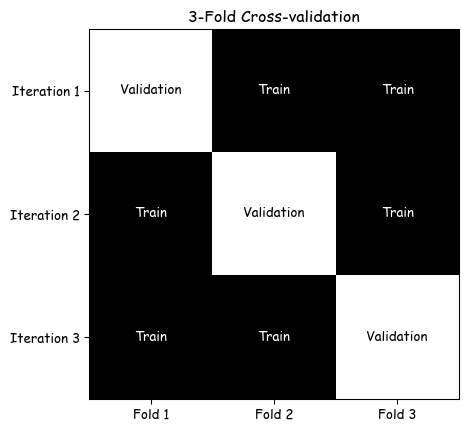

With each iteration, $2/3$ of the dataset is used for training and $1/3$
for validation.

Each row of the table represents an iteration within the $k$-fold
cross-validation process, with the number of iterations equating to the
number of folds. In each iteration, one fold is designated for
validation, while the remaining $k-1$ folds are utilized for training
the model.

## 5-Fold Cross-validation

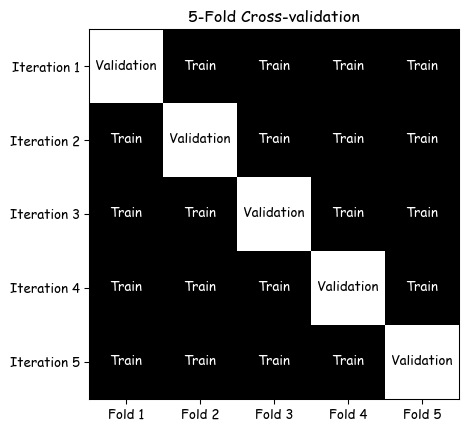

With each iteration, $4/5$ of the dataset is used for training and $1/5$
for validation.

## More Reliable Model Evaluation

-   More **reliable** estimate of model performance compared to a single
    train-test split.
-   **Reduces the variability** associated with a single split, leading
    to a **more stable and unbiased evaluation**.
-   For large values of $k$[1], consider the **average**, **variance**,
    and **confidence interval**.

## Better Generalization

-   Helps in assessing how the model **generalizes** to an independent
    dataset.
-   It ensures that the model’s performance is not overly **optimistic**
    or **pessimistic** by averaging results over multiple folds.

## Efficient Use of Data

-   **Particularly beneficial for small datasets**, cross-validation
    ensures that every data point is used for both training and
    validation.
-   This **maximizes the use of available data**, leading to more
    accurate and reliable model training.

Some examples are more informative for learning algorithms, sometimes
those near the decision boundary.

## Hyperparameter Tuning

-   Commonly used during **hyperparameter tuning**, allowing for the
    **selection of the best model parameters** based on their
    performance across multiple folds.
-   This helps in identifying the **optimal** configuration that
    balances **bias** and **variance**.

## Challenges

-   **Computational Cost**: Requires multiple model trainings.
    -   **Leave-One-Out** (LOO): Extreme case where ( k = N ).
-   **Class Imbalance**: Folds may not represent minority classes.
    -   Use **Stratified Cross-Validation** to maintain class
        proportions.
-   **Complexity**: Error-prone implementation, especially for **nested
    cross-validation**, **bootstraps**, or integration into larger
    pipelines.

Leave-one-out cross-validation (LOO-CV) can lead to overoptimistic
performance evaluation, particularly in certain contexts.

Here’s why:

    1.  **High Variance**: In LOO-CV, each iteration uses almost all the data for training, leaving only one instance for testing. This can result in high variance in the test error across iterations because the model is trained on nearly the full dataset. Since each training set is very similar to the full dataset, it can lead to overly optimistic estimates of generalization error, especially when the dataset is small or the model has high variance (e.g., decision trees or k-nearest neighbors).
    2.  **Overfitting**: Since LOO-CV uses nearly the entire dataset for training in each iteration, complex models (especially ones prone to overfitting) can fit very closely to the data, which might result in a low training error but a misleadingly low test error in some cases.
    3.  **Limited assessment of generalization**: LOO-CV might not give a reliable estimate of how well the model generalizes to completely unseen data because the difference between the training set and the full dataset is minimal, leading to a smaller gap between training and test performance.

In practice, this can make the evaluation appear more optimistic than it
would be with more robust methods like k-fold cross-validation, where
the test sets are larger, and the model has less opportunity to overfit
the training data.

**Stratified (in cross-validation)**: a sampling strategy where each
fold preserves the class distribution of the full dataset, ensuring that
every class is represented proportionally in both training and
validation splits.

## `cross_val_score`

[1] 10-fold cross-validation.

In [8]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score    

clf_scores = cross_val_score(clf, X, y, cv=5)

print("\nScores:", clf_scores)
print(f"\nMean: {clf_scores.mean():.2f}")
print(f"\nStandard deviation: {clf_scores.std():.2f}")


Scores: [0.71428571 0.66883117 0.71428571 0.79738562 0.73202614]

Mean: 0.73

Standard deviation: 0.04

[sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html),
see also
[cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate).

As previously discussed, a significant limitation of decision trees is
their propensity for overfitting, which leads to high variance when
applied to new datasets. This issue is evident in the observed
performance variability, with accuracy ranging from 67% to 79%, which is
undesirable for achieving robust model generalization.

# Hyperparameter tuning

## Workflow

![](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

**Attribution**: [Cross-validation: evaluating estimator
performance](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

The above image implicitly introduces three categories of data subsets:
**training**, **validation**, and **test**.

## Workflow - implementation

In [9]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name='diabetes', version=1, return_X_y=True)

y = y.map({'tested_negative': 0, 'tested_positive': 1})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

To maintain simplicity in these lecture notes, we have not applied any
pre-processing steps.

## Definition

A **hyperparameter** is a configuration **external to the model** that
is **set prior to the training process** and governs the learning
process, influencing model performance and complexity.

The **weights of a model**, which are learned by the learning algorithm,
are often referred to as the **model’s parameters**. To avoid confusion,
**user-defined parameters**, such as the learning rate $\alpha$, are
termed **hyperparameters**. Unlike model parameters, hyperparameters are
*not* learned by the learning algorithm.

## Hyperparameters - Decision Tree

-   `criterion`: `gini`, `entropy`, `log_loss`, measure the quality of a
    split.
-   `max_depth`: limits the **number of levels** in the tree to prevent
    overfitting.

**See**:
[DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

## Hyperparameters - Logistic Regression

-   `penalty`: `l1` or `l2`, helps in preventing overfitting.
-   `solver`: `liblinear`, `newton-cg`, `lbfgs`, `sag`, `saga`.
-   `max_iter`: maximum number of iterations taken for the solvers to
    converge.
-   `tol`: stopping criteria, smaller values mean higher precision.

**See**:
[LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)
and
[SGDClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html).

## Hyperparameters - KNN

-   `n_neighbors`: number of neighbors to use for $k$-neighbors queries.
-   `weights`: `uniform` or `distance`, equal weight or distance-based
    weight.

**See**:
[KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

## Experiment: `max_depth`

In [10]:
for value in [3, 5, 7, None]:

  clf = tree.DecisionTreeClassifier(max_depth=value)

  clf_scores = cross_val_score(clf, X_train, y_train, cv=10)

  print("\nmax_depth = ", value)
  print(f"Mean: {clf_scores.mean():.2f}")
  print(f"Standard deviation: {clf_scores.std():.2f}")


max_depth =  3
Mean: 0.74
Standard deviation: 0.04

max_depth =  5
Mean: 0.76
Standard deviation: 0.04

max_depth =  7
Mean: 0.73
Standard deviation: 0.04

max_depth =  None
Mean: 0.71
Standard deviation: 0.05

## Experiment: `criterion`

In [11]:
for value in ["gini", "entropy", "log_loss"]:

  clf = tree.DecisionTreeClassifier(max_depth=5, criterion=value)

  clf_scores = cross_val_score(clf, X_train, y_train, cv=10)

  print("\ncriterion = ", value)
  print(f"Mean: {clf_scores.mean():.2f}")
  print(f"Standard deviation: {clf_scores.std():.2f}")


criterion =  gini
Mean: 0.76
Standard deviation: 0.04

criterion =  entropy
Mean: 0.75
Standard deviation: 0.05

criterion =  log_loss
Mean: 0.75
Standard deviation: 0.05

For this specific problem and dataset, the `criterion` parameter has a
limited impact on the learning process.

## Experiment: `n_neighbors`

In [12]:
from sklearn.neighbors import KNeighborsClassifier

for value in range(1, 11):

  clf = KNeighborsClassifier(n_neighbors=value)

  clf_scores = cross_val_score(clf, X_train, y_train, cv=10)

  print("\nn_neighbors = ", value)
  print(f"Mean: {clf_scores.mean():.2f}")
  print(f"Standard deviation: {clf_scores.std():.2f}")


n_neighbors =  1
Mean: 0.67
Standard deviation: 0.05

n_neighbors =  2
Mean: 0.71
Standard deviation: 0.03

n_neighbors =  3
Mean: 0.69
Standard deviation: 0.05

n_neighbors =  4
Mean: 0.73
Standard deviation: 0.03

n_neighbors =  5
Mean: 0.72
Standard deviation: 0.03

n_neighbors =  6
Mean: 0.73
Standard deviation: 0.05

n_neighbors =  7
Mean: 0.74
Standard deviation: 0.04

n_neighbors =  8
Mean: 0.75
Standard deviation: 0.04

n_neighbors =  9
Mean: 0.73
Standard deviation: 0.05

n_neighbors =  10
Mean: 0.73
Standard deviation: 0.04

## Experiment: `weights`

In [13]:
from sklearn.neighbors import KNeighborsClassifier

for value in ["uniform", "distance"]:

  clf = KNeighborsClassifier(n_neighbors=5, weights=value)

  clf_scores = cross_val_score(clf, X_train, y_train, cv=10)

  print("\nweights = ", value)
  print(f"Mean: {clf_scores.mean():.2f}")
  print(f"Standard deviation: {clf_scores.std():.2f}")


weights =  uniform
Mean: 0.72
Standard deviation: 0.03

weights =  distance
Mean: 0.73
Standard deviation: 0.04

For this specific problem and dataset, the `weights` parameter has a
limited impact on the learning process.

At this point, you might hypothesize that certain combinations of
hyperparameters could be more optimal than others.

## Hyperparameter Tuning: Grid Search

-   **Many hyperparameters** need tuning

    -   Major **disadvantage** of ML algorithms

-   **Manual exploration** of combinations is tedious

-   **Grid search** is more systematic

    1.  **Enumerate all** possible hyperparameter combinations

    2.  Train on training set, evaluate on validation set

**Initially**, try powers of 2 or 10. Next, **refine** with grid search
near optimal values if time permits.

The **training set** referred to here is **different** from the one
previously mentioned. In each iteration of the $k$-fold cross-validation
process, a **unique** **training** and **validation set** is created.

In some contexts, the **choice of the model** itself can be considered a
hyperparameter. For instance, when performing model selection within a
machine learning pipeline, different algorithms (e.g., decision trees,
support vector machines, neural networks) can be treated as
hyperparameters. This approach allows for the selection of the
best-performing model through automated processes such as grid search or
random search, alongside the tuning of other hyperparameters.

Thus, while traditionally hyperparameters refer to settings within a
specific model, the model choice can also be incorporated into
hyperparameter optimization frameworks.

As will be discussed later, the choice of the **number of layers** and
the **number of nodes** are often considered hyperparameters when
training **deep learning** algorithms.

## `GridSearchCV`

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'max_depth': range(1, 10),
   'criterion': ["gini", "entropy", "log_loss"]}
]

clf = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

(grid_search.best_params_, grid_search.best_score_)

({'criterion': 'gini', 'max_depth': 5}, np.float64(0.7481910124074653))

## GridSearchCV

In [15]:
param_grid = [
  {'n_neighbors': range(1, 15),
   'weights': ["uniform", "distance"]}
]

clf = KNeighborsClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

(grid_search.best_params_, grid_search.best_score_)

({'n_neighbors': 14, 'weights': 'uniform'}, np.float64(0.7554165363361485))

The variable `param_grid` contains a dictionary specifying the names of
the parameters to be tuned, along with the respective values to be
tested.

In this instance, the parameters `n_neighbors` and `weights` are being
tuned. However, additional parameters could be included if necessary.

## `GridSearchCV`

In [17]:
from sklearn.linear_model import LogisticRegression

# 2 * 5 * 5 * 3 = 150 tests!

param_grid = [
  {'penalty': ["l1", "l2", None],
   'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
   'max_iter' : [100, 200, 400, 800, 1600],
   'tol' : [0.01, 0.001, 0.0001]}
]

clf = LogisticRegression()

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

(grid_search.best_params_, grid_search.best_score_)

({'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001},
 np.float64(0.7756646856427901))

## Randomized Search

-   **Large number of combinations **(many hyperparameters, many values)
-   Use **RandomizedSearchCV**:
    -   Supply **list of values** or **probability distribution** for
        hyperparameters
    -   Specify **number of iterations** (combinations to try)
    -   Predictable **execution time**

**See**: [Comparing randomized search and grid search for hyperparameter
estimation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html).

## Workflow

![](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

**Attribution**: [Cross-validation: evaluating estimator
performance](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

As the ongoing example illustrates, in addition to evaluating various
hyperparameter values, multiple models can also be tested.

## Finally, we proceed with testing

In [18]:
clf = LogisticRegression(max_iter=100, penalty='l2', solver='newton-cg', tol=0.001)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        52
           1       0.64      0.64      0.64        25

    accuracy                           0.77        77
   macro avg       0.73      0.73      0.73        77
weighted avg       0.77      0.77      0.77        77


It appears that we are facing a **class imbalance issue**, which should
have been identified earlier in our workflow!

# Prologue

## Summary

-   **Training Set Size**: Impact on model efficacy and generalization.
-   **Attribute Encoding**: Evaluation of techniques to capture
    biological phenomena.
-   **Preprocessing**:
    -   Data Scaling
    -   Handling Missing Values
    -   Managing Class Imbalance

## Next lecture

-   We will further discuss machine learning engineering.

## References

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa